<img src="../Pierian-Data-Logo.PNG">
<br>
<strong><center>Copyright 2019. Created by Jose Marcial Portilla.</center></strong>

# CNN Exercises
For these exercises we'll work with the <a href='https://www.kaggle.com/zalando-research/fashionmnist'>Fashion-MNIST</a> dataset, also available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. Like MNIST, this dataset consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

## Perform standard imports, load the Fashion-MNIST dataset
Run the cell below to load the libraries needed for this exercise and the Fashion-MNIST dataset.<br>
PyTorch makes the Fashion-MNIST dataset available through <a href='https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist'><tt><strong>torchvision</strong></tt></a>. The first time it's called, the dataset will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='../Data', train=False, download=True, transform=transform)

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

## 1. Create data loaders
Use DataLoader to create a <tt>train_loader</tt> and a <tt>test_loader</tt>. Batch sizes should be 10 for both.

In [3]:
# CODE HERE
train_loader = DataLoader(train_data,batch_size=20,shuffle=True)
test_loader = DataLoader(test_data,batch_size=20,shuffle=True)

In [2]:
# DON'T WRITE HERE

## 2. Examine a batch of images
Use DataLoader, <tt>make_grid</tt> and matplotlib to display the first batch of 10 images.<br>
OPTIONAL: display the labels as well

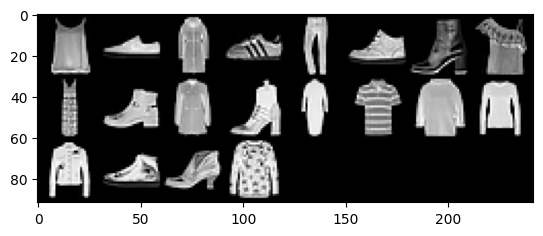

In [8]:
for im,label in train_loader:
    break
img = make_grid(im,nrow=8)
plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
plt.show()

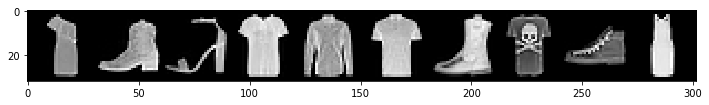

In [3]:
# DON'T WRITE HERE
# IMAGES ONLY

Label:  [9 2 5 9 4 2 1 2 7 3]
Class:  Boot Sweater Sandal Boot Coat Sweater Trouser Sweater Sneaker Dress


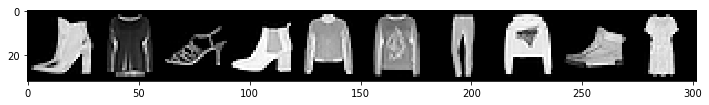

In [4]:
# DON'T WRITE HERE
# IMAGES AND LABELS

## Downsampling
<h3>3. If a 28x28 image is passed through a Convolutional layer using a 5x5 filter, a step size of 1, and no padding, what is the resulting matrix size?</h3>

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [9]:
##################################################
###### ONLY RUN THIS TO CHECK YOUR ANSWER! ######
################################################

# Run the code below to check your answer:
conv = nn.Conv2d(1, 1, 5, 1)
for x,labels in train_loader:
    print('Orig size:',x.shape)
    break
x = conv(x)
print('Down size:',x.shape)

Orig size: torch.Size([20, 1, 28, 28])
Down size: torch.Size([20, 1, 24, 24])


### 4. If the sample from question 3 is then passed through a 2x2 MaxPooling layer, what is the resulting matrix size?

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [10]:
##################################################
###### ONLY RUN THIS TO CHECK YOUR ANSWER! ######
################################################

# Run the code below to check your answer:
x = F.max_pool2d(x, 2, 2)
print('Down size:',x.shape)

Down size: torch.Size([20, 1, 12, 12])


## CNN definition
### 5. Define a convolutional neural network
Define a CNN model that can be trained on the Fashion-MNIST dataset. The model should contain two convolutional layers, two pooling layers, and two fully connected layers. You can use any number of neurons per layer so long as the model takes in a 28x28 image and returns an output of 10. Portions of the definition have been filled in for convenience.

In [22]:
# CODE HERE
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3,stride=1)
        self.bn1 = nn.BatchNorm2d(6)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=3,stride=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(5*5*16,128)
        self.fc2 = nn.Linear(128,32)
        self.out = nn.Linear(32,10)
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x,2,2)
        x = x.view(-1,5*5*16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return F.log_softmax(x,dim=1)
torch.manual_seed(101)
device = torch.device("mps")
model = ConvolutionalNetwork().to(device)

## Trainable parameters

### 6. What is the total number of trainable parameters (weights & biases) in the model above?
Answers will vary depending on your model definition.

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [23]:
total = 0
for p in model.parameters():
    total += p.numel()
    print(p.numel())
print(f"total : {total}")

54
6
6
6
864
16
16
16
51200
128
4096
32
320
10
total : 56770


### 7. Define loss function & optimizer
Define a loss function called "criterion" and an optimizer called "optimizer".<br>
You can use any functions you want, although we used Cross Entropy Loss and Adam (learning rate of 0.001) respectively.

In [24]:
# CODE HERE
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()
num_epochs = 10

In [6]:
# DON'T WRITE HERE

### 8. Train the model
Don't worry about tracking loss values, displaying results, or validating the test set. Just train the model through 5 epochs. We'll evaluate the trained model in the next step.<br>
OPTIONAL: print something after each epoch to indicate training progress.

In [25]:
# CODE HERE
for epoch in range(num_epochs):
    model.train()
    for img,label in train_loader:
        img,label = img.to(device),label.to(device)
        y_pred = model(img)
        loss = criterion(y_pred,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"epoch : {epoch+1} loss : {loss.item()}")



epoch : 1 loss : 0.4749162793159485
epoch : 2 loss : 0.2657475471496582
epoch : 3 loss : 0.20894820988178253
epoch : 4 loss : 0.30614155530929565
epoch : 5 loss : 0.21887533366680145
epoch : 6 loss : 0.1080421656370163
epoch : 7 loss : 0.04103049635887146
epoch : 8 loss : 0.17810440063476562
epoch : 9 loss : 0.09825075417757034
epoch : 10 loss : 0.22037935256958008


1 of 5 epochs completed
2 of 5 epochs completed
3 of 5 epochs completed
4 of 5 epochs completed
5 of 5 epochs completed


### 9. Evaluate the model
Set <tt>model.eval()</tt> and determine the percentage correct out of 10,000 total test images.

In [27]:
# CODE HERE
from sklearn.metrics import classification_report
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for img, label in test_loader:
        img,label = img.to(device),label.to(device)
        pred = model(img)
        pred = torch.argmax(pred, dim=1)
        
        # Collect predictions and labels
        all_preds.extend(pred.cpu().numpy())
        all_labels.extend(label.cpu().numpy())

# Now, use classification_report with the collected predictions and labels
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.88      0.80      0.83      1000
           3       0.90      0.91      0.91      1000
           4       0.82      0.86      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.69      0.75      0.72      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Test accuracy: 8733/10000 =  87.330%


## Great job!